# RV and Observable Plots

In [1]:
import os
import numpy as np
import pandas as pd
import tamar.tools.plotting_funcs as plot
import matplotlib.pyplot as plt
from tamar.tools.settings import CsvDir

Read in velocities from csv.

In [2]:
# csv file with rv components
csv_file = os.path.join(CsvDir.ACTIVE, '02072021_native.csv')

Get component lists.

In [3]:
# create pandas dataframe
component_df = pd.read_csv(csv_file)

Get dates.

In [4]:
# get dates list
date_jd = component_df.date_jd.values
inds = np.argsort(date_jd)


In [5]:
# dates
date_jd = component_df.date_jd.values[inds]
dates = component_df.date_obs.values[inds]

# get velocities lists
v_phot = component_df.v_phot.values[inds]
v_conv = component_df.v_conv.values[inds]
# rv_sun = component_df.rv_sun.values[inds]
rv_model = component_df.rv_model_weather_coeff.values[inds]
vphot_bright = component_df.vphot_bright.values[inds]
vphot_spot = component_df.vphot_spot.values[inds]

# get magnetic observables
f = component_df.f.values[inds]
Bobs = component_df.Bobs.values[inds]
f_bright = component_df.f_bright.values[inds]
f_spot = component_df.f_spot.values[inds]

# Timeseries

In [6]:
save_fig = None

Get the weird looking dates.

In [7]:

eind = np.where(Bobs <=7.9)[0]
date_jd = np.delete(date_jd, eind)
v_conv = np.delete(v_conv, eind)
v_phot = np.delete(v_phot, eind)
rv_model = np.delete(rv_model, eind)
Bobs = np.delete(Bobs, eind)
f = np.delete(f, eind)
f_spot = np.delete(f_spot, eind)
f_bright = np.delete(f_bright, eind)

sind = np.argmax(Bobs)
eind = np.arange(sind, sind+6, 1)
date_jd = np.delete(date_jd, eind)
v_conv = np.delete(v_conv, eind)
v_phot = np.delete(v_phot, eind)
rv_model = np.delete(rv_model, eind)
Bobs = np.delete(Bobs, eind)
f = np.delete(f, eind)
f_spot = np.delete(f_spot, eind)
f_bright = np.delete(f_bright, eind)

plot_dates = date_jd - date_jd[0]
plot_dates *= 24*60

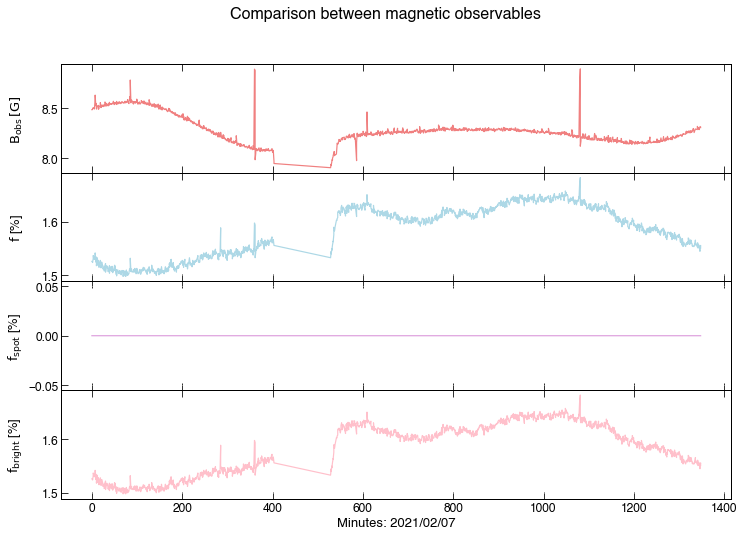

In [8]:
x = plot_dates
# y_list = [rv_model, Bobs]
y_list = [Bobs, f, f_spot, f_bright]

xlabel = 'Minutes: 2021/02/07'
ylabel_list = [r'$\rm B_{\rm obs} \/\rm [G]$', r'$\rm f$ [%]',  r'$\rm f_{\rm spot}$ [%]',  r'$\rm f_{\rm bright}$ [%]']
title = 'Comparison between magnetic observables'
# save_fig = '/Users/tervin/images/neid_long/timeseries_rvmodel_Bobs.png'

plot.vert_plot_timeseries(x, y_list, title, xlabel, ylabel_list, save_fig)

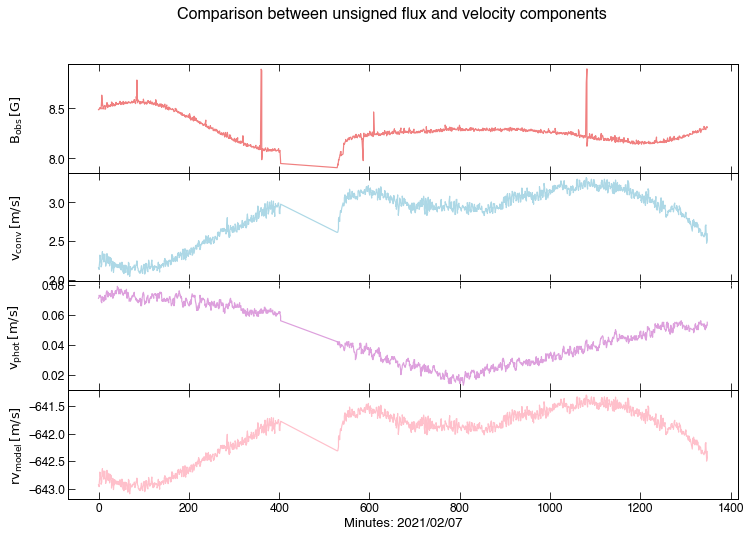

In [9]:
x = plot_dates
# y_list = [rv_model, Bobs]
y_list = [Bobs, v_conv, v_phot, rv_model]

xlabel = 'Minutes: 2021/02/07'
ylabel_list = [r'$\rm B_{\rm obs} \/\rm [G]$', r'$\rm v_{\rm conv} \/\rm [m/s]$',  r'$\rm v_{\rm phot} \/\rm [m/s]$',  r'$\rm rv_{\rm model} \/\rm [m/s]$']
title = 'Comparison between unsigned flux and velocity components'
# save_fig = '/Users/tervin/images/neid_long/timeseries_rvmodel_Bobs.png'

plot.vert_plot_timeseries(x, y_list, title, xlabel, ylabel_list, save_fig)

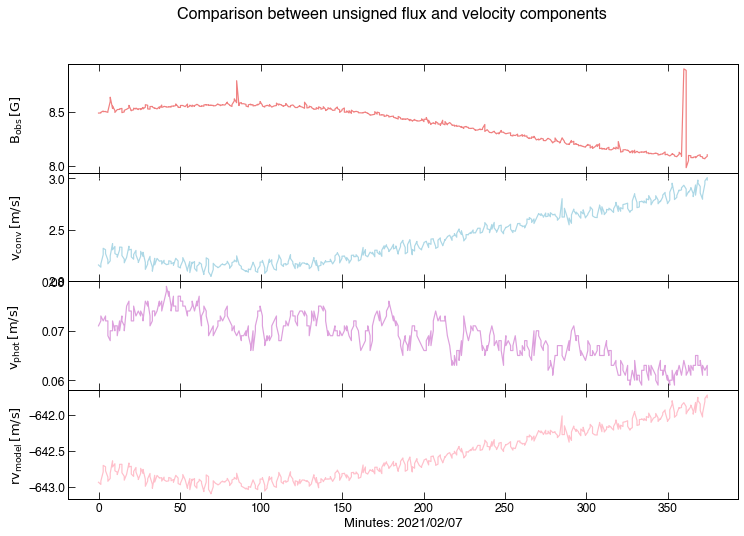

In [10]:
lnth = 500
x = plot_dates[:lnth]
# y_list = [rv_model, Bobs]
y_list = [Bobs[:lnth], v_conv[:lnth], v_phot[:lnth], rv_model[:lnth]]

xlabel = 'Minutes: 2021/02/07'
ylabel_list = [r'$\rm B_{\rm obs} \/\rm [G]$', r'$\rm v_{\rm conv} \/\rm [m/s]$',  r'$\rm v_{\rm phot} \/\rm [m/s]$',  r'$\rm rv_{\rm model} \/\rm [m/s]$']
title = 'Comparison between unsigned flux and velocity components'
# save_fig = '/Users/tervin/images/neid_long/timeseries_rvmodel_Bobs.png'

plot.vert_plot_timeseries(x, y_list, title, xlabel, ylabel_list, save_fig)



# Plot Periodogram

In [11]:
from scipy.signal import lombscargle

In [12]:
rv = rv_model
jd = date_jd

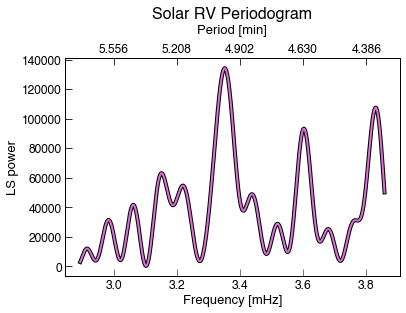

In [13]:
# rough time sampling
djd = np.median(np.diff(jd)) # days
djd_s = djd * 24. * 3600. # seconds
djd_hz = 1. / djd_s # hz
freqs = np.linspace(djd_hz / 4, djd_hz/3., 3500)
drv = (rv - np.mean(rv))*1e3
jd_s = (jd - min(jd)) * 24. * 3600.
ls = lombscargle(jd_s, drv, freqs)
def tick_function(X):
    V = (1./ (X * 1e-3)) * 1/60.
    return ['%.3f' % z for z in V]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
xvals = freqs * 1e3
data = ls
ax1.plot(xvals, data, 'k',lw=2,alpha=0)
ax1.plot(xvals, data, 'r',lw=0.5,alpha=0)
ax1Ticks = ax1.get_xticks()
ax2Ticks = ax1Ticks
ax2.set_xticks(ax2Ticks)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax2Ticks))
ax1.set_xlabel('Frequency [mHz]')
ax2.set_xlabel('Period [min]', labelpad=10)
ax1.set_ylabel('LS power')
ax1.grid(True)
ax2.plot(xvals, data, 'black', lw=4.)
ax2.plot(xvals, data, 'orchid', lw=2.)
title = ax1.set_title('Solar RV Periodogram')
title.set_y(1.2)
plt.show()


